In [0]:
import os
import numpy as np  
import pandas as pd
%matplotlib inline 
import matplotlib as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
ratings_data = pd.read_csv('/content/drive/My Drive/Test/Rec System/RS - Project-1/ratings_Electronics.csv',names=["userId", "productId", "ratings", "timestamp"])  
ratings_data.head() 

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [0]:
df1 = ratings_data[["userId", "productId", "ratings"]]

In [0]:
df = df1.sample(frac= .001)

In [6]:
df.shape

(7824, 3)

In [0]:
df.isna().sum()

userId       0
productId    0
ratings      0
timestamp    0
dtype: int64

In [0]:
df.groupby('userId').sum()

,ratings,timestamp
userId,,
A00000262KYZUE4J55XGL,5.0,1353456000
A000063614T1OE0BUSKUT,10.0,2730240000
A00009182QVLSWIGHLS1B,5.0,1364947200
A00009661LC9LQPGKJ24G,5.0,1351209600
A00010809P09NUU6ZP6H,5.0,1365379200
...,...,...
AZZZOVIBXHGDR,10.0,3981139200
AZZZRS1YZ8HVP,8.0,2706998400
AZZZSIK7NFFVP,5.0,1385942400


In [0]:
userId= df['userId'].unique()
userId

array(['AKM1MP6P0OYPR', 'A2CX7LUOHB2NDG', 'A2NWSAGRHCP8N5', ...,
       'A180UGKKYCPDH0', 'A2IGIIABRZ5LAB', 'A10M2KEFPEQDHN'], dtype=object)

In [0]:
productId= df['productId'].unique()
productId

array(['0132793040', '0321732944', '0439886341', ..., 'BT008T2BGK',
       'BT008UKTMW', 'BT008V9J9U'], dtype=object)

In [0]:
print(len(userId))
print(len(productId))
print(len(ratings_data))

4201696
476002
7824482


In [0]:
print(df.nunique())

userId       4201696
productId     476002
ratings            5
timestamp       5489
dtype: int64


In [0]:
print(df.describe())

            ratings     timestamp
count  7.824482e+06  7.824482e+06
mean   4.012337e+00  1.338178e+09
std    1.380910e+00  6.900426e+07
min    1.000000e+00  9.127296e+08
25%    3.000000e+00  1.315354e+09
50%    5.000000e+00  1.361059e+09
75%    5.000000e+00  1.386115e+09
max    5.000000e+00  1.406074e+09


In [0]:
df['ratings'].value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: ratings, dtype: int64

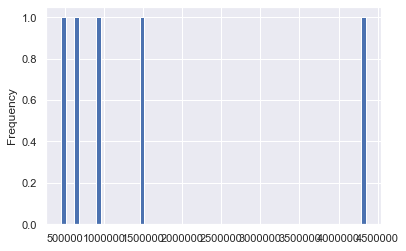

In [0]:
df['ratings'].value_counts().plot(kind= 'hist', bins=70)

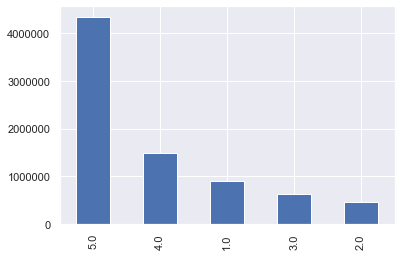

In [0]:
df['ratings'].value_counts().plot(kind= 'bar')

In [0]:
#ratings_data = ratings_data.sample(frac=0.1)

In [0]:
#ratings_data.shape

In [0]:
df.isnull().any()

userId       False
productId    False
ratings      False
timestamp    False
dtype: bool

In [0]:
df.dtypes

userId        object
productId     object
ratings      float64
timestamp      int64
dtype: object

In [0]:
df['userId'].value_counts()

ADLVFFE4VBT8    1
Name: userId, dtype: int64

In [0]:
df.dtypes

userId        object
productId     object
ratings      float64
timestamp      int64
dtype: object

In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,7824482.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,7824482.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


In [0]:
ratings_data_grouped = df.groupby(['userId']).agg({'ratings': 'count'}).reset_index()
ratings_data_grouped.sort_values('ratings',ascending = 0)

,userId,ratings
3263531,A5JLAU2ARJ0BO,520
3512451,ADLVFFE4VBT8,501
2989526,A3OXHLG6DIBRW8,498
3291008,A6FIAB28IS79,431
3284634,A680RUE1FDO8B,406
...,...,...
1661484,A2HRB8UOXH92SQ,1
1661486,A2HRBA4HO2E4GU,1
1661487,A2HRBCM00IDK56,1
1661488,A2HRBEBDTIB8MT,1


In [0]:
ratings_df=ratings_data_grouped[ratings_data_grouped['ratings']>50]

In [0]:
ratings_df

,userId,ratings
5506,A100UD67AHFODS,116
5558,A100WO06OQR8BQ,132
9928,A105S56ODHGJEK,68
9965,A105TOJ6LTVMBG,71
13836,A10AFVU66A79Y1,65
...,...,...
4181090,AZBXKUH4AIW3X,53
4181493,AZCE11PSTCH1L,60
4190671,AZMY6E8B52L2T,189
4191432,AZNUHQSHZHSUE,54


In [0]:
#rating_df = pd.merge(df, ratings_data, on='userId') 

In [0]:
#rating_df.tail()

In [0]:
#rating_df=rating_df.drop('ratings_x',axis=1)


In [0]:
#rating_df.head()

In [0]:
#rating_df=rating_df.rename(columns={'ratings_y':'rating'})
#rating_df.head()

                                       Popularity Based Recomendaton System

In [0]:
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=df.groupby("productId").filter(lambda x:x['ratings'].count() >=50)

In [0]:
new_df

,userId,productId,ratings,timestamp
183,A1BKC6B7YHYTVV,0972683275,4.0,1405382400
184,AWVFSIB42LHKJ,0972683275,4.0,1405209600
185,A36MQBNADRH8YY,0972683275,5.0,1405641600
186,A3SRXMPLAEZ6DP,0972683275,4.0,1405987200
187,A20XXTXWF2TCPY,0972683275,5.0,1405123200
...,...,...,...,...
7824223,A2857SW4TZ841C,B00L3YHF6O,1.0,1405814400
7824224,A2Y2NSH2HVFAOA,B00L3YHF6O,5.0,1405641600
7824225,A3TC2716OF7HK8,B00L3YHF6O,5.0,1405900800
7824226,AYCPSPX7XZ21G,B00L3YHF6O,5.0,1405987200


In [0]:
no_of_ratings_per_product = new_df.groupby(by='productId')['ratings'].count().sort_values(ascending=False)

In [0]:
no_of_ratings_per_product

productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
              ...  
B00DTMXQYI       50
B003MVZ8NI       50
B007FLQ8D0       50
B003LZRAFO       50
B009GGC4B2       50
Name: ratings, Length: 26226, dtype: int64

In [0]:
#Average rating of the product 
new_df.groupby('productId')['ratings'].mean().head()

productId
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
Name: ratings, dtype: float64

In [0]:

#Average rating of the product in descending order
new_df.groupby('productId')['ratings'].mean().sort_values(ascending=False).head()

productId
B002E6R7NG    4.980392
B004I763AW    4.966667
B003J9QQWU    4.964286
B0043ZLFXE    4.955556
B000TMFYBO    4.953125
Name: ratings, dtype: float64

In [0]:
#Total no of rating for product
new_df.groupby('productId')['ratings'].count().sort_values(ascending=False).head()

productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: ratings, dtype: int64

In [0]:
ratings_mean_count = pd.DataFrame(new_df.groupby('productId')['ratings'].mean())

In [0]:
ratings_mean_count

,ratings
productId,
0972683275,4.470980
1400501466,3.560000
1400501520,4.243902
1400501776,3.884892
1400532620,3.684211
...,...
B00KFAGCUM,4.824427
B00KGGJPX6,4.592593
B00KINSDK8,3.576923


In [0]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('productId')['ratings'].count())
ratings_mean_count

,ratings,rating_counts
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171
...,...,...
B00KFAGCUM,4.824427,131
B00KGGJPX6,4.592593,54
B00KINSDK8,3.576923,52


In [0]:
ratings_mean_count['rating_counts'].max()

18244

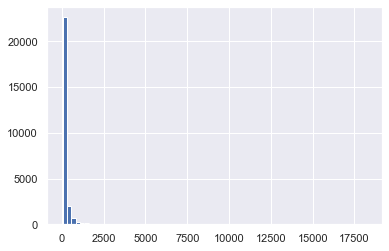

In [0]:
import seaborn as sns


ratings_mean_count['rating_counts'].hist(bins=70)

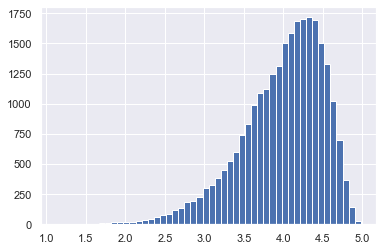

In [0]:
ratings_mean_count['ratings'].hist(bins=50)

In [0]:
popular_products = pd.DataFrame(new_df.groupby('productId')['ratings'].count())
popular_products

,ratings
productId,
0972683275,1051
1400501466,250
1400501520,82
1400501776,139
1400532620,171
...,...
B00KFAGCUM,131
B00KGGJPX6,54
B00KINSDK8,52


In [0]:
most_popular = popular_products.sort_values('ratings', ascending=False)
most_popular

,ratings
productId,
B0074BW614,18244
B00DR0PDNE,16454
B007WTAJTO,14172
B0019EHU8G,12285
B006GWO5WK,12226
...,...
B002653KNQ,50
B001W81LZ2,50
B0001G6UES,50


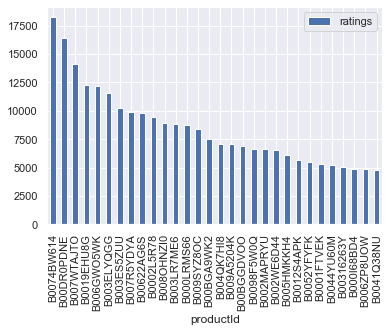

In [0]:
most_popular.head(30).plot(kind = "bar")

                         SVD BASED HYBRID MODEL

In [16]:
#data['raw_ratings'] = data['raw_ratings']
data.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [7]:
pip install surprise

In [0]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split

In [0]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'productId', 'ratings']], reader)
train_data, test_data = train_test_split(data, test_size = 0.30)

In [9]:
algo = KNNWithMeans(k=10, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(train_data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [0]:
test_pred = algo.test(test_data)

In [11]:
test_pred

[Prediction(uid='A2WH4JB4S6B2U1', iid='B0012GK3MQ', r_ui=5.0, est=4.018991964937911, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1N2K1M4SFEKXA', iid='B00004RJYB', r_ui=5.0, est=4.018991964937911, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='AUOL8284BYMV7', iid='B00083Y0YG', r_ui=5.0, est=4.018991964937911, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2PSC7LUNIDEAH', iid='B004DMNT2W', r_ui=5.0, est=4.018991964937911, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3LOMERD6DK7BG', iid='B002A8IDQI', r_ui=5.0, est=4.018991964937911, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3E5EWDDS1RWVW', iid='B0007P4G6M', r_ui=1.0, est=4.018991964937911, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2J4M8NVV3DQAN', i

In [12]:
# Get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.4063


1.4063291002405907

In [0]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, r_ui, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [0]:
top_n = get_top_n(test_pred, n=5)

In [0]:
#Top 5 recomandation
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

In [0]:
#From SVD

In [0]:
from collections import defaultdict

from surprise import SVD
from surprise import Dataset

In [0]:
trainset = data.build_full_trainset()

In [30]:
trainset.ur

defaultdict(list,
            {0: [(0, 1.0)],
             1: [(1, 1.0)],
             2: [(2, 5.0)],
             3: [(3, 5.0)],
             4: [(4, 5.0)],
             5: [(5, 1.0)],
             6: [(6, 5.0)],
             7: [(7, 4.0)],
             8: [(8, 1.0)],
             9: [(9, 1.0)],
             10: [(10, 5.0)],
             11: [(11, 1.0)],
             12: [(12, 5.0)],
             13: [(13, 4.0)],
             14: [(14, 3.0)],
             15: [(15, 5.0)],
             16: [(16, 5.0)],
             17: [(17, 5.0)],
             18: [(18, 5.0)],
             19: [(19, 4.0)],
             20: [(20, 5.0)],
             21: [(21, 5.0)],
             22: [(22, 2.0)],
             23: [(23, 1.0)],
             24: [(24, 2.0)],
             25: [(25, 5.0)],
             26: [(26, 3.0)],
             27: [(27, 5.0)],
             28: [(28, 4.0)],
             29: [(29, 5.0)],
             30: [(30, 4.0)],
             31: [(31, 5.0)],
             32: [(32, 4.0)],
            

In [31]:
algo = SVD()
algo.fit(trainset)

In [0]:
testset = trainset.build_anti_testset()

In [33]:
testset

[('A7P9UUK1HE1UX', 'B0015AQLJI', 4.006774028629857),
 ('A7P9UUK1HE1UX', 'B00933N22S', 4.006774028629857),
 ('A7P9UUK1HE1UX', 'B003V3RIAI', 4.006774028629857),
 ('A7P9UUK1HE1UX', 'B004PGM9YK', 4.006774028629857),
 ('A7P9UUK1HE1UX', 'B00DEM1O1A', 4.006774028629857),
 ('A7P9UUK1HE1UX', 'B000BT5HFS', 4.006774028629857),
 ('A7P9UUK1HE1UX', 'B00EEO4WD4', 4.006774028629857),
 ('A7P9UUK1HE1UX', 'B0053NBLFW', 4.006774028629857),
 ('A7P9UUK1HE1UX', 'B009NTJ4LA', 4.006774028629857),
 ('A7P9UUK1HE1UX', 'B009HMPKYI', 4.006774028629857),
 ('A7P9UUK1HE1UX', 'B0035FZJJ4', 4.006774028629857),
 ('A7P9UUK1HE1UX', 'B00DZ467TG', 4.006774028629857),
 ('A7P9UUK1HE1UX', 'B0087TVYP6', 4.006774028629857),
 ('A7P9UUK1HE1UX', 'B008OEHPKM', 4.006774028629857),
 ('A7P9UUK1HE1UX', 'B0084NQXGU', 4.006774028629857),
 ('A7P9UUK1HE1UX', 'B007WTAJTO', 4.006774028629857),
 ('A7P9UUK1HE1UX', 'B00C1AGE6G', 4.006774028629857),
 ('A7P9UUK1HE1UX', 'B0097BEDOC', 4.006774028629857),
 ('A7P9UUK1HE1UX', 'B004HENUPW', 4.00677402862

In [0]:
predictions = algo.test(testset)

In [0]:
predictions

In [0]:
def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [0]:
top_n = get_top_n(predictions, n=10)

In [0]:
top_n

In [0]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])